# `forecast` Package Demonstration

For more information about the package, click [here](https://cran.r-project.org/web/packages/forecast/index.html)

In [135]:
library(forecast)
library(ggplot2)
library(tidyverse)
library(zoo) 
library(seasonal)



## Data

Data sets included in the package

- `gas`: Australian monthly gas production 1956–1995
- `gold`: Daily morning gold prices
- `taylor`: Half-hourly electricity demand
- `wineind`: Australian total wine sales by wine makers in bottles <= 1 litre. Jan 1980 – Aug 1994.
- `woolyrnq`: Quarterly production of woollen yarn in Australia


In [136]:
head(gas, 5*12)



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1956,1709,1646,1794,1878,2173,2321,2468,2416,2184,2121,1962,1825
1957,1751,1688,1920,1941,2311,2279,2638,2448,2279,2163,1941,1878
1958,1773,1688,1783,1984,2290,2511,2712,2522,2342,2195,1931,1910
1959,1730,1688,1899,1994,2342,2553,2712,2627,2363,2311,2026,1910
1960,1762,1815,2005,2089,2617,2828,2965,2891,2532,2363,2216,2026


In [137]:
head(gold, 5*12)



A Time Series:
 [1] 306.25 299.50 303.45 296.75 304.40 298.35 304.00 304.00 301.25 302.50
[11] 302.45 305.80 306.90 307.00 306.85 302.15 301.90 299.25 298.60 303.50
[21] 303.00 304.90 304.80 301.25 301.75 303.45 302.50 300.60 300.00 303.45
[31] 302.80 303.40 304.90 304.95 302.90 302.85 302.00 298.80 290.00 285.00
[41] 290.75 290.50 288.10 288.30 288.85 286.70 289.30 289.00 290.25 288.75
[51] 290.10 290.25 289.90 293.70 307.25 333.25 312.50 320.75 315.90 316.00

In [138]:
head(taylor, 5*12)



A Time Series:
 [1] 22262 21756 22247 22759 22549 22313 22128 21860 21751 21336 21363 22176
[13] 24649 27466 31020 33529 35428 36034 36834 37296 37338 37608 37692 37944
[25] 37880 37493 37065 36855 36871 36837 36603 36982 37369 37650 37413 36475
[37] 35486 34452 33704 32883 31940 32215 32572 32850 32251 30895 28460 26572
[49] 25093 24320 24684 25338 24943 24637 24424 24163 23943 23324 23412 24065
attr(,"msts")
[1]  48 336

In [139]:
head(wineind, 5*12)



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,15136,16733,20016,17708,18019,19227,22893,23739,21133,22591,26786,29740
1981,15028,17977,20008,21354,19498,22125,25817,28779,20960,22254,27392,29945
1982,16933,17892,20533,23569,22417,22084,26580,27454,24081,23451,28991,31386
1983,16896,20045,23471,21747,25621,23859,25500,30998,24475,23145,29701,34365
1984,17556,22077,25702,22214,26886,23191,27831,35406,23195,25110,30009,36242


In [140]:
head(woolyrnq, 5*12)



,Qtr1,Qtr2,Qtr3,Qtr4
1965,6172,6709,6633,6660
1966,6786,6800,6730,6765
1967,6720,7133,6946,7095
1968,7047,6757,6915,6921
1969,7064,7206,7190,7402
1970,7819,7300,7105,7259
1971,7001,7475,6840,7061
1972,5845,7529,7819,6943
1973,5714,6556,7045,5947
1974,5463,6127,5540,4235


## `TBATS`

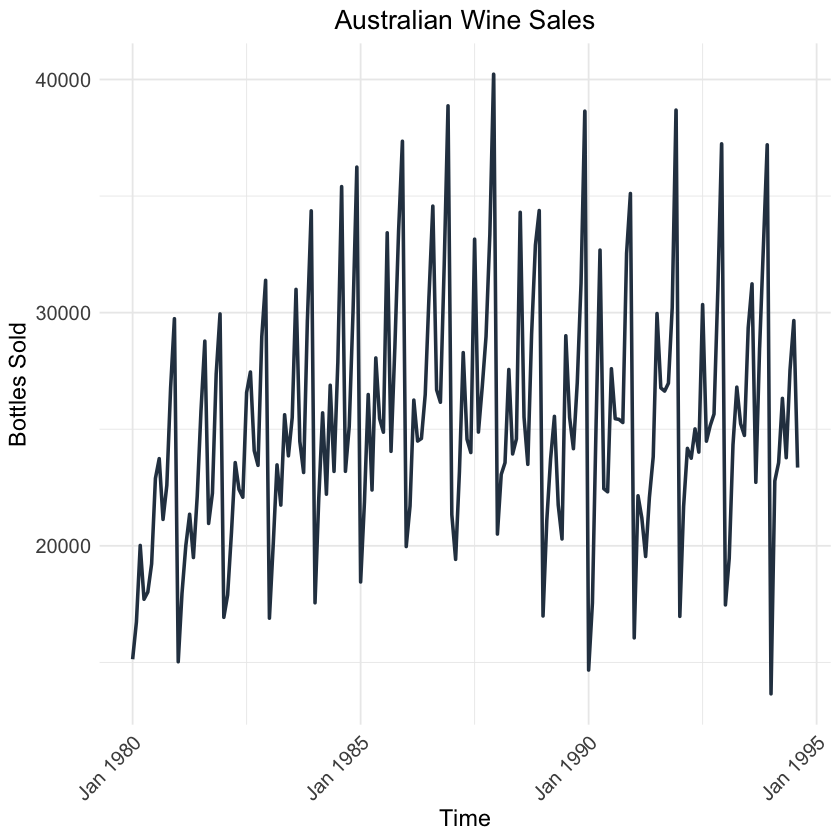

In [150]:

# initial look at the data
wine_df <- data.frame(
  Time = as.yearmon(time(wineind)),
  wineind = as.vector(wineind)
)

ggplot(wine_df, aes(x = Time, y = wineind)) +
  geom_line(color = "#2C3E50", size = 1) +  
  labs(x = "Time", y = "Bottles Sold", title = "Australian Wine Sales") +
  theme_minimal() +  
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), 
    axis.text.y = element_text(size = 12), 
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(size = 16, hjust = 0.5) 
  )


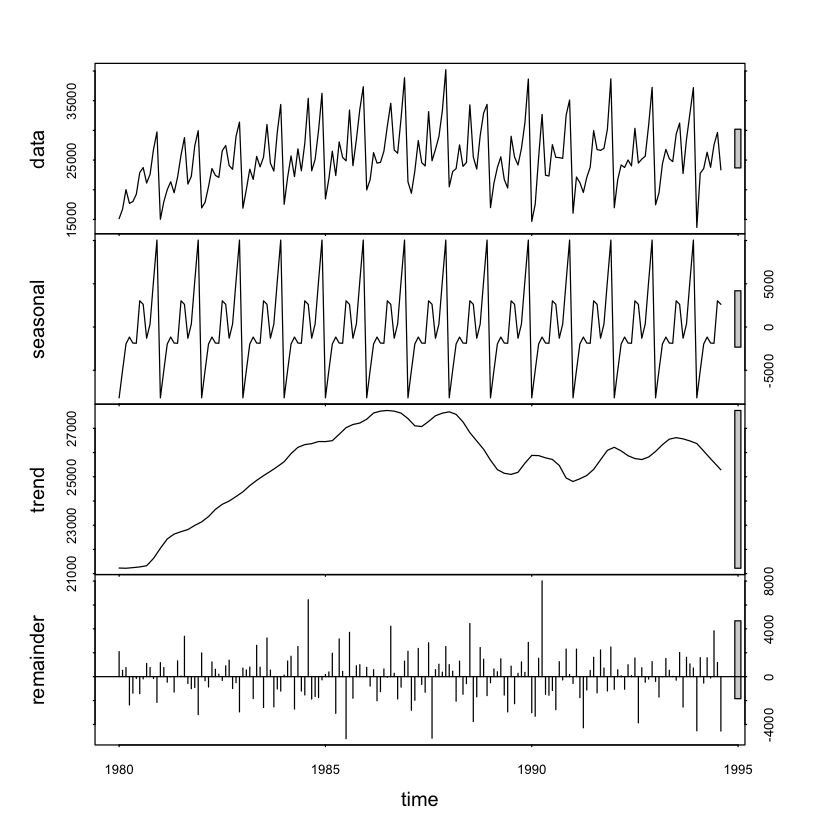

In [142]:
# stl
stl_decomp <- stl(wineind, s.window="periodic")
par(bg = "white")
plot(stl_decomp)

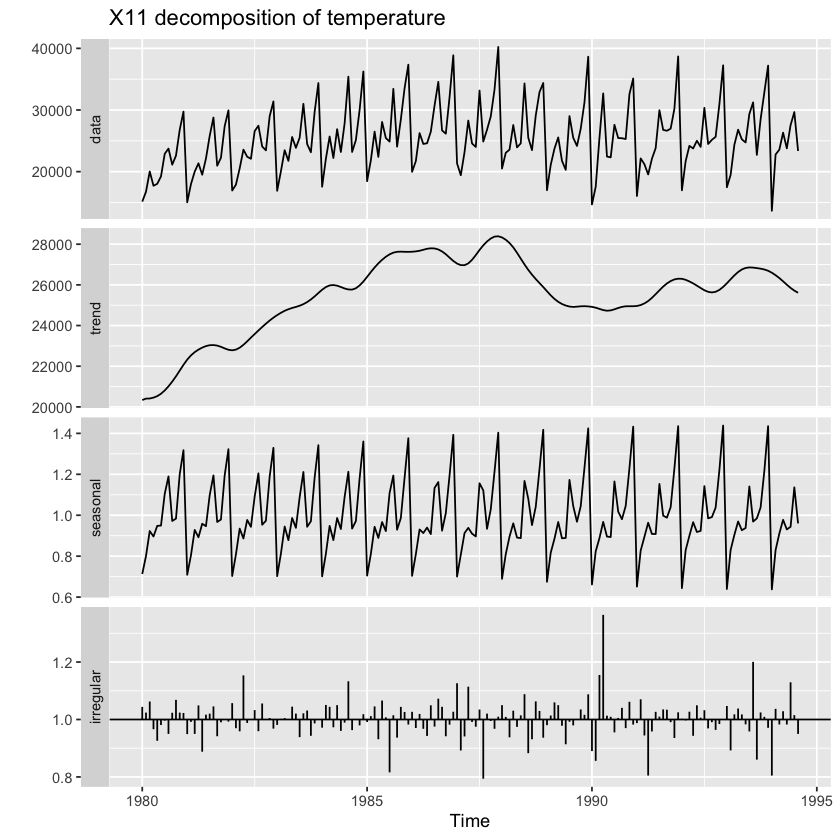

In [143]:
# x11
par(bg = "white")

wineind %>% seas(x11="") -> fit
autoplot(fit) +
  ggtitle("X11 decomposition of temperature")


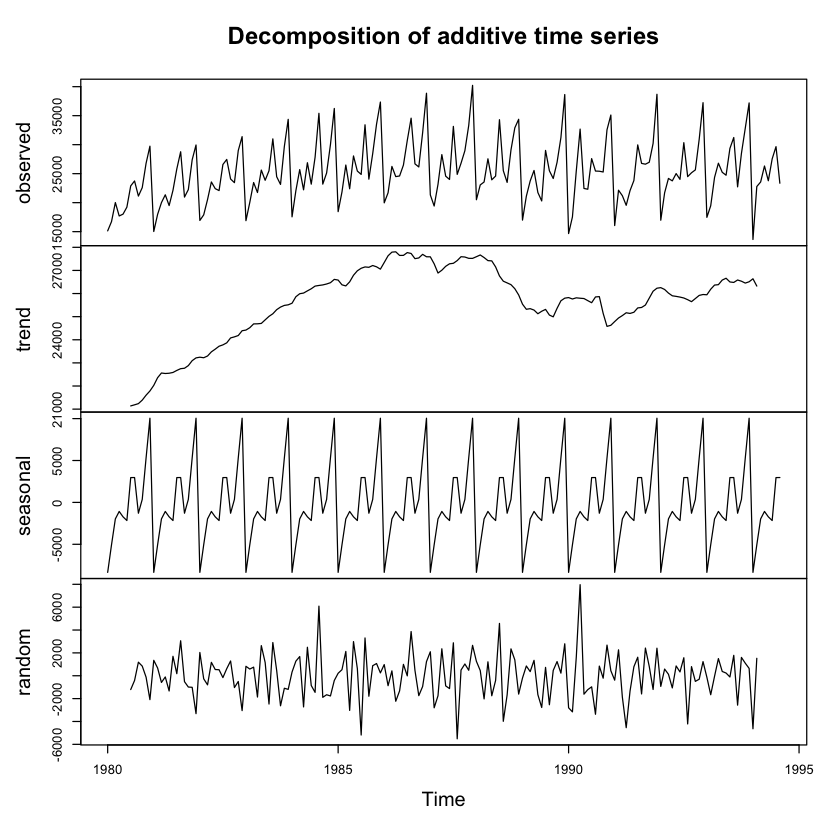

In [144]:
# decomposition
ts_data_decomposed <- decompose(wineind, type = 'additive')
par(bg='white')
plot(ts_data_decomposed)


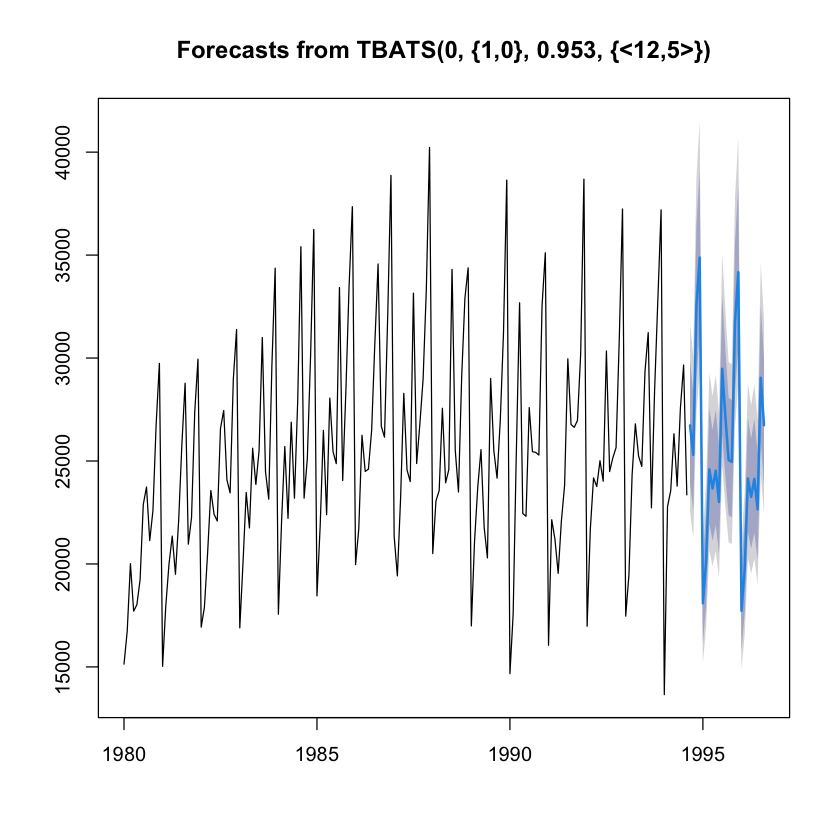

In [145]:
# fit
fit_tbats <- tbats(wineind)

# forecast
forecast_tbats <- forecast(fit_tbats)

par(bg='white')
plot(forecast_tbats)

In [146]:

# calculate rmse
fitted_values <- fitted(fit_tbats)
rmse <- sqrt(mean((wineind - fitted_values)^2, na.rm = TRUE))

#print
print(paste("RMSE:", rmse))


[1] "RMSE: 2210.94103497635"



1. **Historical Data**: The black line represents the historical data of the time series.
2. **Forecast**: The blue line shows the forecasted values.
3. **Confidence Intervals**: The shaded area around the forecast represents the confidence intervals.
4. **Model Parameters**: The title of the plot shows the estimated parameters of the TBATS model.
   - The estimated value of the Box-Cox transformation parameter.
   - The ARMA(p,q) components for the errors.
   - The damping parameter for the trend.
   - The seasonal periods that the model has identified.



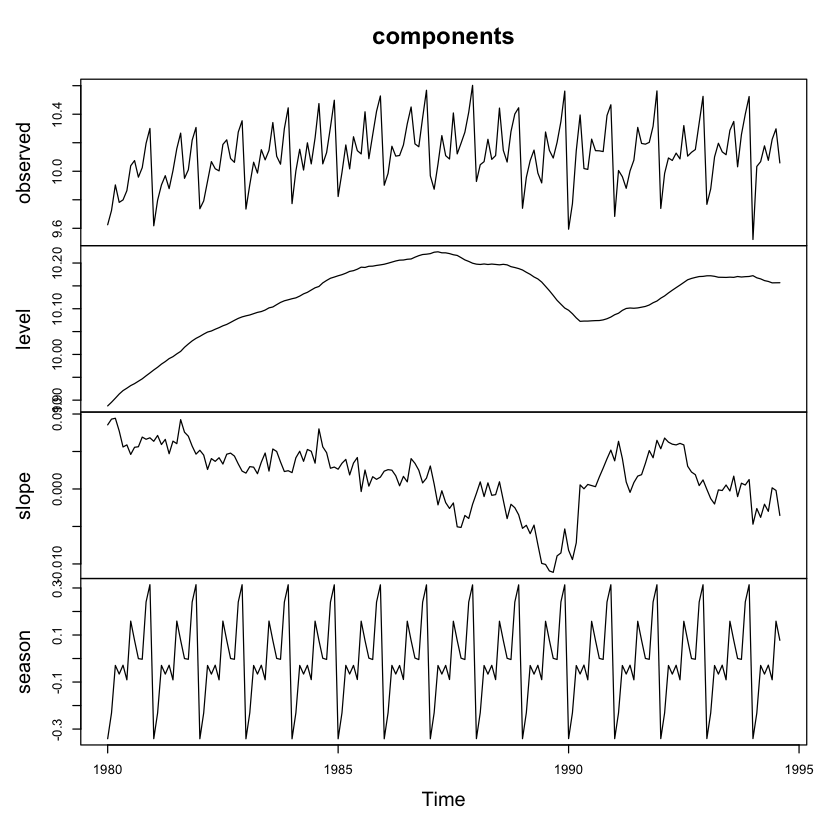

In [147]:
# get components
components <- tbats.components(fit_tbats)

# plotting the decomposed components
par(bg='white')

plot(components)